<a href="https://colab.research.google.com/github/heysourin/NLP-01/blob/main/Paper%3A%20NLP-almost-from-scratch/nlp_from_scratch_almost_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Understanding Chunking**

In [14]:
import nltk
from nltk import pos_tag
from nltk import RegexpParser

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
quote = "If you tell the truth, you don't have to remember anything"

In [6]:
tokens = nltk.word_tokenize(quote)
tokens

['If',
 'you',
 'tell',
 'the',
 'truth',
 ',',
 'you',
 'do',
 "n't",
 'have',
 'to',
 'remember',
 'anything']

In [15]:
tags = nltk.pos_tag(tokens)
tags

[('If', 'IN'),
 ('you', 'PRP'),
 ('tell', 'VBP'),
 ('the', 'DT'),
 ('truth', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('have', 'VB'),
 ('to', 'TO'),
 ('remember', 'VB'),
 ('anything', 'NN')]

In [8]:
grammar = "NP: {<DT>?<JJ>*<NN>}"
# It defines a noun phrase (NP) as a sequence of words that may start with an optional determiner, followed by zero or more adjectives, and ending with a singular noun.

In [10]:
cp = nltk.RegexpParser(grammar)

In [19]:
res = cp.parse(tags)

In [22]:
print(res)

(S
  If/IN
  you/PRP
  tell/VBP
  (NP the/DT truth/NN)
  ,/,
  you/PRP
  do/VBP
  n't/RB
  have/VB
  to/TO
  remember/VB
  (NP anything/NN))


## **Named Entity Recognition**

In [25]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [26]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [27]:
doc = nlp("Tesla INC is going to acquire Twitter for $45 billion")

In [29]:
for ent in doc.ents:
  print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

Tesla INC | ORG | Companies, agencies, institutions, etc.
Twitter | PRODUCT | Objects, vehicles, foods, etc. (not services)
$45 billion | MONEY | Monetary values, including unit


In [30]:
from spacy import displacy

displacy.render(doc, style="ent")

In [31]:
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [32]:
doc = nlp("Michael Bloomberg founded Bloomberg in 1982.")

In [33]:
for ent in doc.ents:
  print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

Michael Bloomberg | PERSON | People, including fictional
Bloomberg | PERSON | People, including fictional
1982 | DATE | Absolute or relative dates or periods


In [48]:
doc = nlp("Tesla INC is going to acquire Twitter for $45 billion")

In [51]:
# Tagging named entity yourself
from spacy.tokens import Span

s1 = Span(doc, 0, 1, label='ORG')
s2 = Span(doc, 6, 7, label='ORG')

doc.set_ents([s1, s2], default = 'unmodified')

In [52]:
for ent in doc.ents:
  print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

Tesla INC | ORG | Companies, agencies, institutions, etc.
Twitter | ORG | Companies, agencies, institutions, etc.
$45 billion | MONEY | Monetary values, including unit


## **Semantic Book Labelling**
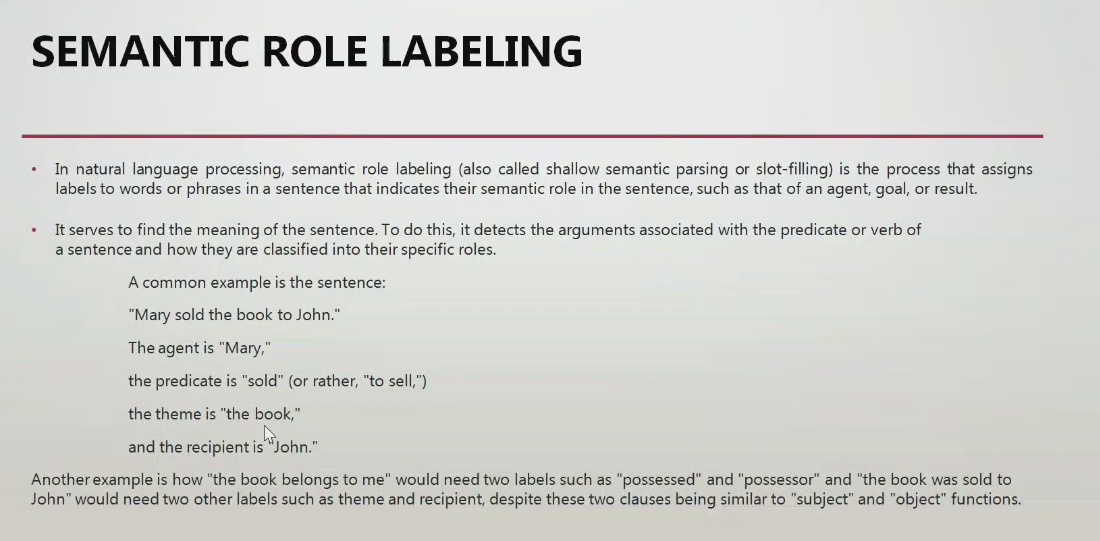

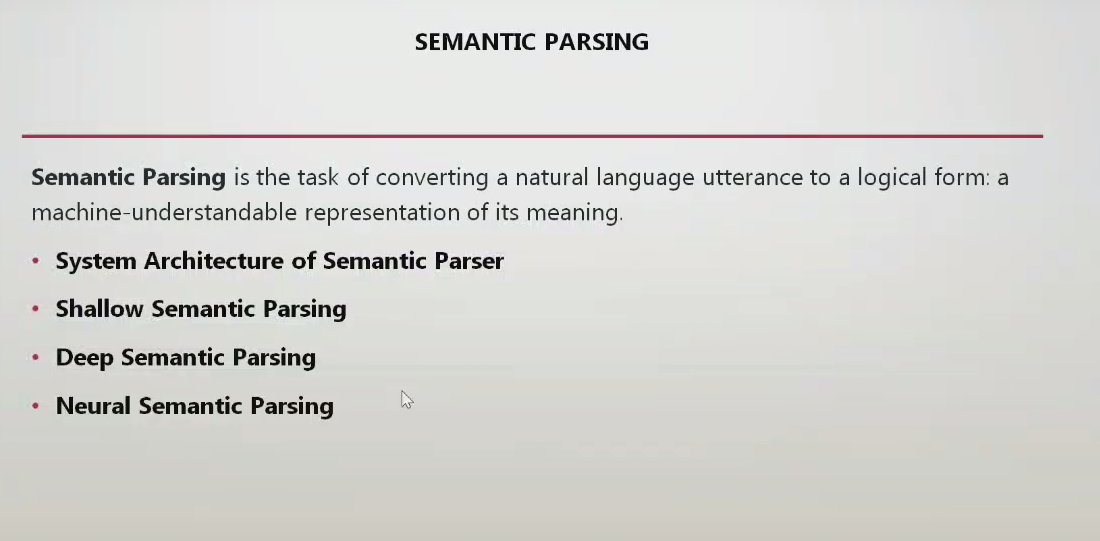

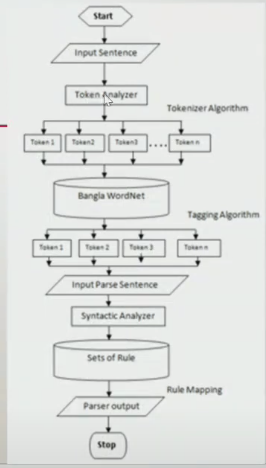